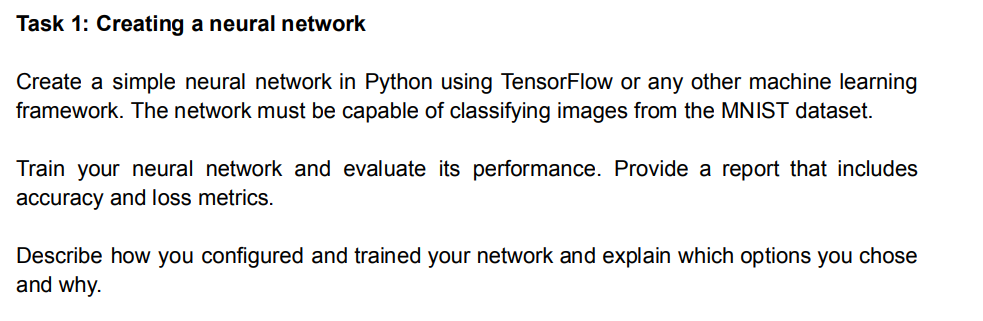


# **Solution**

### The Project involves the following steps:


1.   Importing Necessary Libreries
2.   Scrping the Data
3.   Data Preprocessing
4.   Developing a Neural Network
5.   Evaluate the Model
6.   Storing the Model
7.   Deployment via Streamlit in Web
8.   Final Report









N.B: The description and proper justification of the code have provided in a readme.txt file. Final Report submitted seperately in a pdf format.

Mount Drive
- Exporting and importing data/models in google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the Libreries

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

Load and preprocess the MNIST dataset


In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 [==============================] - 0s 0us/step


Build the neural network model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train the model


In [ ]:
# model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

In [ ]:
# Train the model and store the history
history = model.fit(train_images, train_labels, epochs=50, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/50
938/938 [==============================] - 55s 58ms/step - loss: 0.0979 - accuracy: 0.9695 - val_loss: 0.0565 - val_accuracy: 0.9817
Epoch 2/50
938/938 [==============================] - 52s 56ms/step - loss: 0.0469 - accuracy: 0.9856 - val_loss: 0.0482 - val_accuracy: 0.9833
Epoch 3/50
938/938 [==============================] - 53s 56ms/step - loss: 0.0346 - accuracy: 0.9891 - val_loss: 0.0297 - val_accuracy: 0.9892
Epoch 4/50
938/938 [==============================] - 55s 58ms/step - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0331 - val_accuracy: 0.9886
Epoch 5/50
938/938 [==============================] - 51s 55ms/step - loss: 0.0219 - accuracy: 0.9928 - val_loss: 0.0310 - val_accuracy: 0.9894
Epoch 6/50
938/938 [==============================] - 51s 55ms/step - loss: 0.0173 - accuracy: 0.9941 - val_loss: 0.0324 - val_accuracy: 0.9900
Epoch 7/50
938/938 [==============================] - 51s 55ms/step - loss: 0.0152 - accuracy: 0.9951 - val_loss: 0.0244 - val_accuracy:

In [ ]:
# # Plot training history
# plt.figure(figsize=(12, 4))

Evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

313/313 [==============================] - 2s 8ms/step - loss: 0.0570 - accuracy: 0.9931
Test Accuracy: 0.9930999875068665


Evaluate the model on the test set

In [ ]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

313/313 [==============================] - 5s 15ms/step


Plot training & validation accuracy values

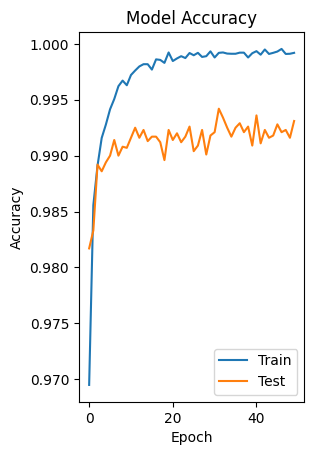

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')

Plot training & validation loss values

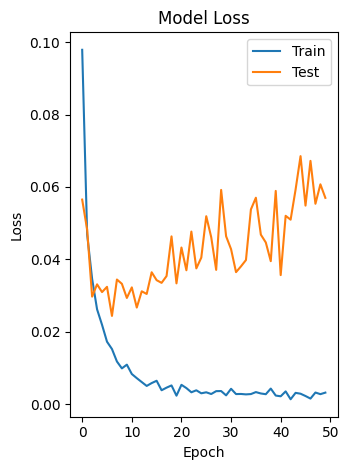

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')

plt.tight_layout()
plt.show()

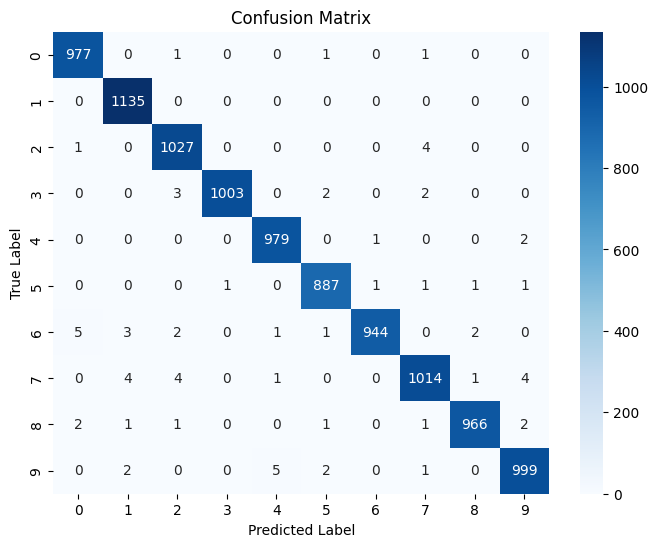

In [ ]:
# Create and plot the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Save the model


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


See the classification on web portal with Streamlit

In [ ]:
import streamlit as st
from PIL import Image
import numpy as np

# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/mnist_model.h5')

# Streamlit app
st.title("MNIST Image Classification")

uploaded_file = st.file_uploader("Choose an image...", type="jpg")

if uploaded_file is not None:
    # Preprocess the image
    image = Image.open(uploaded_file)
    image = image.resize((28, 28))
    image_array = np.array(image)
    image_array = image_array.reshape((1, 28, 28, 1)).astype('float32') / 255

    # Make predictions
    predictions = model.predict(image_array)
    predicted_label = np.argmax(predictions)

    st.image(image, caption=f"Predicted Digit: {predicted_label}", use_column_width=True)


2023-11-14 11:44:04.676 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [ ]:
!pip install colab-xterm
%load_ext colabxterm
%xterm